<a href="https://colab.research.google.com/github/Viny2030/sklearn/blob/main/metrics_regression_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression

In this notebook, we present the metrics that can be used in regression.

A set of metrics are dedicated to regression. Indeed, classification metrics
cannot be used to evaluate the generalization performance of regression models
because there is a fundamental difference between their target type `target`:
it is a continuous variable in regression, while a discrete variable in
classification.

We use the Ames housing dataset. The goal is to predict the price of houses in
the city of Ames, Iowa. As with classification, we only use a single
train-test split to focus solely on the regression metrics.

In [3]:
import pandas as pd
import numpy as np

ames_housing = pd.read_csv("https://raw.githubusercontent.com/Viny2030/datasets/refs/heads/main/House%20Prices.csv")
data = ames_housing.drop(columns="Price")
target = ames_housing["Price"]
data = data.select_dtypes(np.number)
target /= 1000

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Let's start by splitting our dataset intro a train and test set.

# Nota

Si desea obtener una descripción más detallada de este conjunto de datos, puede consultar la sección Apéndice - Descripción de conjuntos de datos al final de este MOOC.

Comencemos por dividir nuestro conjunto de datos en un conjunto de prueba y uno de entrenamiento.

In [4]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    data, target, shuffle=True, random_state=0
)

Some machine learning models are designed to be solved as an optimization
problem: minimizing an error (also known as the loss function) using a
training set. A basic loss function used in regression is the mean squared
error (MSE). Thus, this metric is sometimes used to evaluate the model since
it is optimized by said model.

We give an example using a linear regression model.

Algunos modelos de aprendizaje automático están diseñados para ser resueltos como un problema de optimización: minimizando un error (también conocido como función de pérdida) utilizando un conjunto de entrenamiento. Una función de pérdida básica utilizada en regresión es el error cuadrático medio (MSE). Por lo tanto, esta métrica se utiliza a veces para evaluar el modelo ya que está optimizado por dicho modelo.

Damos un ejemplo utilizando un modelo de regresión lineal.


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()
regressor.fit(data_train, target_train)
target_predicted = regressor.predict(data_train)

print(
    "Mean squared error on the training set: "
    f"{mean_squared_error(target_train, target_predicted):.3f}"
)

Mean squared error on the training set: 41732.453


Our linear regression model is minimizing the mean squared error on the
training set. It means that there is no other set of coefficients which
decreases the error.

Then, we can compute the mean squared error on the test set.

Nuestro modelo de regresión lineal minimiza el error cuadrático medio en el conjunto de entrenamiento. Esto significa que no existe ningún otro conjunto de coeficientes que reduzca el error.

Luego, podemos calcular el error cuadrático medio en el conjunto de prueba.

In [6]:
target_predicted = regressor.predict(data_test)

print(
    "Mean squared error on the testing set: "
    f"{mean_squared_error(target_test, target_predicted):.3f}"
)

Mean squared error on the testing set: 36928.925


The raw MSE can be difficult to interpret. One way is to rescale the MSE by
the variance of the target. This score is known as the $R^2$ also called the
[coefficient of
determination](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination).
Indeed, this is the default score used in scikit-learn by calling the method
`score`.

El MSE bruto puede ser difícil de interpretar. Una forma de hacerlo es reescalarlo según la varianza del objetivo. Esta puntuación se conoce como R2, también llamado coeficiente de determinación. De hecho, esta es la puntuación predeterminada que se utiliza en scikit-learn al llamar al método score.

In [7]:
regressor.score(data_test, target_test)

0.7038724445177829

The $R^2$ score represents the proportion of variance of the target that is
explained by the independent variables in the model. The best score possible
is 1 but there is no lower bound. However, a model that predicts the expected
value of the target would get a score of 0.

La puntuación R2 representa la proporción de la varianza del objetivo que se explica por las variables independientes del modelo. La mejor puntuación posible es 1, pero no hay límite inferior. Sin embargo, un modelo que prediga el valor esperado del objetivo obtendría una puntuación de 0.

In [8]:
from sklearn.dummy import DummyRegressor

dummy_regressor = DummyRegressor(strategy="mean")
dummy_regressor.fit(data_train, target_train)
print(
    "R2 score for a regressor predicting the mean:"
    f"{dummy_regressor.score(data_test, target_test):.3f}"
)

R2 score for a regressor predicting the mean:-0.000


The $R^2$ score gives insight into the quality of the model's fit. However,
this score cannot be compared from one dataset to another and the value
obtained does not have a meaningful interpretation relative the original unit
of the target. If we wanted to get an interpretable score, we would be
interested in the median or mean absolute error.

La puntuación R2 nos da una idea de la calidad del ajuste del modelo. Sin embargo, esta puntuación no se puede comparar de un conjunto de datos a otro y el valor obtenido no tiene una interpretación significativa en relación con la unidad original del objetivo. Si quisiéramos obtener una puntuación interpretable, nos interesaría la mediana o el error absoluto medio.

In [9]:
from sklearn.metrics import mean_absolute_error

target_predicted = regressor.predict(data_test)
print(
    "Mean absolute error: "
    f"{mean_absolute_error(target_test, target_predicted):.3f} k$"
)

Mean absolute error: 126.058 k$


By computing the mean absolute error, we can interpret that our model is
predicting on average 22.6 k\\$ away from the true house price. A disadvantage
of this metric is that the mean can be impacted by large error. For some
applications, we might not want these large errors to have such a big
influence on our metric. In this case we can use the median absolute error.

Al calcular el error absoluto medio, podemos interpretar que nuestro modelo predice, en promedio, un margen de 22,6 k$ respecto del precio real de la vivienda. Una desventaja de esta métrica es que la media puede verse afectada por errores grandes. Para algunas aplicaciones, es posible que no queramos que estos errores grandes tengan una influencia tan grande en nuestra métrica. En este caso, podemos utilizar el error absoluto medio.

[ ]

In [10]:
from sklearn.metrics import median_absolute_error

print(
    "Median absolute error: "
    f"{median_absolute_error(target_test, target_predicted):.3f} k$"
)

Median absolute error: 89.367 k$


The mean absolute error (or median absolute error) still have a known
limitation: committing an error of 50 k\\$ for a house valued at 50 k\\$ has the
same impact than committing an error of 50 k\\$ for a house valued at 500 k\\$.
Indeed, the mean absolute error is not relative.

The mean absolute percentage error introduce this relative scaling.

El error absoluto medio (o error absoluto medio) tiene una limitación conocida: cometer un error de 50 k\$ para una casa valuada en 50 k\$ tiene el mismo impacto que cometer un error de 50 k\$ para una casa valuada en 500 k\$. De hecho, el error absoluto medio no es relativo.

El error absoluto medio porcentual introduce esta escala relativa.


In [11]:
from sklearn.metrics import mean_absolute_percentage_error

print(
    "Mean absolute percentage error: "
    f"{mean_absolute_percentage_error(target_test, target_predicted) * 100:.3f} %"
)

Mean absolute percentage error: 25.853 %


In addition to using metrics, we can visualize the results by plotting the
predicted values versus the true values.

In an ideal scenario where all variations in the target could be perfectly
explained by the obseved features (i.e. without any unobserved factors of
variations), and we have chosen an optimal model, we would expect all
predictions to fall along the diagonal line of the first plot below.

In the real life, this is almost never the case: some unknown fraction of the
variations in the target cannot be explained by variations in data: they stem
from external factors not represented by the observed features.

Therefore, the best we can hope for is that our model's predictions form a
cloud of points symmetrically distributed around the diagonal line, ideally
close enough to it for the model to be useful.

To gain more insight, it can be helpful to plot the residuals, which represent
the difference between the actual and predicted values, against the predicted
values. This is shown in the second plot.

Residual plots make it easier to assess if the residuals exhibit a variance
independent of the target values or if there is any systematic bias of the
model associated with the lowest or highest predicted values.

Además de utilizar métricas, podemos visualizar los resultados al representar gráficamente los valores predichos frente a los valores verdaderos.

En un escenario ideal en el que todas las variaciones en el objetivo pudieran explicarse perfectamente mediante las características observadas (es decir, sin ningún factor de variación no observado) y hayamos elegido un modelo óptimo, esperaríamos que todas las predicciones cayeran a lo largo de la línea diagonal del primer gráfico que se muestra a continuación.

En la vida real, esto casi nunca sucede: una fracción desconocida de las variaciones en el objetivo no puede explicarse mediante variaciones en los datos: se derivan de factores externos no representados por las características observadas.

Por lo tanto, lo mejor que podemos esperar es que las predicciones de nuestro modelo formen una nube de puntos distribuidos simétricamente alrededor de la línea diagonal, idealmente lo suficientemente cerca de ella para que el modelo sea útil.

Para obtener más información, puede ser útil representar gráficamente los residuos, que representan la diferencia entre los valores reales y predichos, frente a los valores predichos. Esto se muestra en el segundo gráfico.

Los gráficos de residuos facilitan la evaluación si los residuos exhiben una varianza independiente de los valores objetivo o si existe algún sesgo sistemático del modelo asociado con los valores predichos más bajos o más altos.


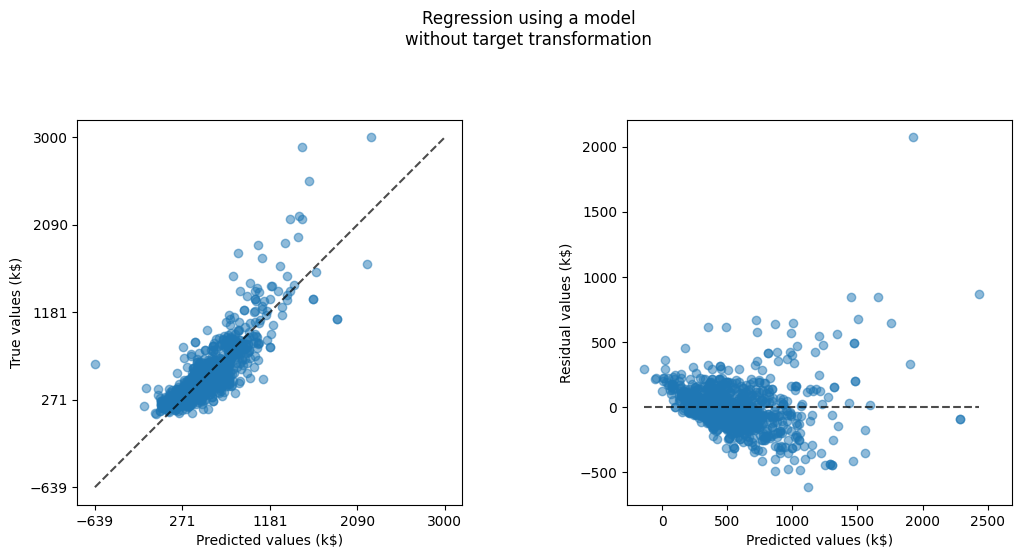

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(13, 5))

PredictionErrorDisplay.from_predictions(
    y_true=target_test,
    y_pred=target_predicted,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[0],
)
axs[0].axis("square")
axs[0].set_xlabel("Predicted values (k$)")
axs[0].set_ylabel("True values (k$)")

PredictionErrorDisplay.from_predictions(
    y_true=target_test,
    y_pred=target_predicted,
    kind="residual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[1],
)
axs[1].axis("square")
axs[1].set_xlabel("Predicted values (k$)")
axs[1].set_ylabel("Residual values (k$)")

_ = fig.suptitle(
    "Regression using a model\nwithout target transformation", y=1.1
)

On these plots, we see that our model tends to under-estimate the price of the
house both for the lowest and large True price values. This means that the
residuals still hold some **structure typically visible as the "banana" or
"smile" shape of the residual plot**. This is often a clue that our model
could be improved, either by transforming the features, the target or
sometimes changing the model type or its parameters. In this case let's try to
see if the model would benefit from a target transformation that monotonically
reshapes the target variable to follow a normal distribution.

En estos gráficos, vemos que nuestro modelo tiende a subestimar el precio de la casa tanto para los valores de precio real más bajos como para los altos. Esto significa que los residuos aún mantienen cierta estructura, típicamente visible como la forma de "banana" o "sonrisa" del gráfico de residuos. Esto suele ser una pista de que nuestro modelo podría mejorarse, ya sea transformando las características, el objetivo o, a veces, cambiando el tipo de modelo o sus parámetros. En este caso, intentemos ver si el modelo se beneficiaría de una transformación del objetivo que reforme monótonamente la variable objetivo para seguir una distribución normal.

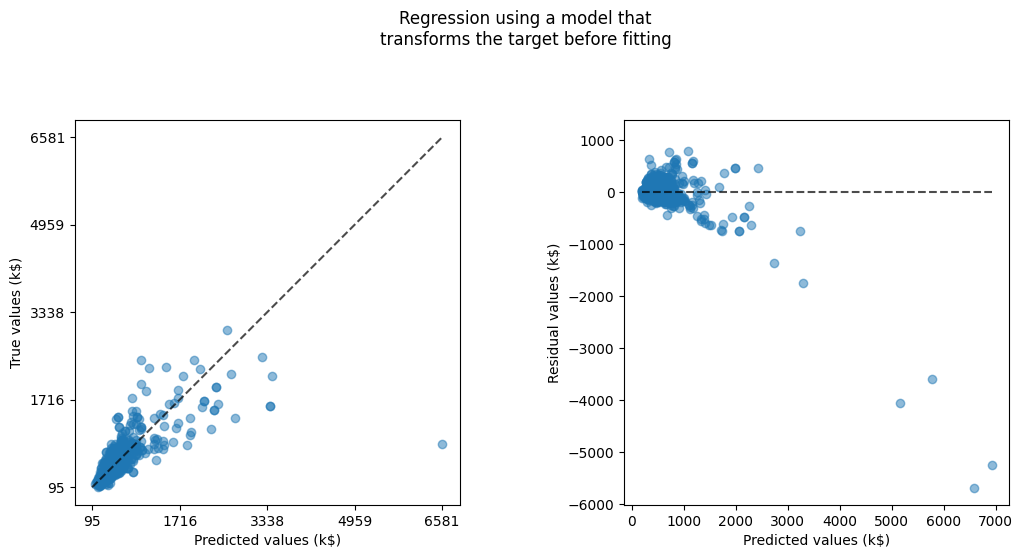

In [13]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.compose import TransformedTargetRegressor

transformer = QuantileTransformer(
    n_quantiles=900, output_distribution="normal"
)
model_transformed_target = TransformedTargetRegressor(
    regressor=regressor, transformer=transformer
)
model_transformed_target.fit(data_train, target_train)
target_predicted = model_transformed_target.predict(data_test)

fig, axs = plt.subplots(ncols=2, figsize=(13, 5))

PredictionErrorDisplay.from_predictions(
    y_true=target_test,
    y_pred=target_predicted,
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[0],
)
axs[0].axis("square")
axs[0].set_xlabel("Predicted values (k$)")
axs[0].set_ylabel("True values (k$)")

PredictionErrorDisplay.from_predictions(
    y_true=target_test,
    y_pred=target_predicted,
    kind="residual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
    ax=axs[1],
)
axs[1].axis("square")
axs[1].set_xlabel("Predicted values (k$)")
axs[1].set_ylabel("Residual values (k$)")

_ = fig.suptitle(
    "Regression using a model that\ntransforms the target before fitting",
    y=1.1,
)

The model with the transformed target seems to exhibit fewer structure in its
residuals: over-estimation and under-estimation errors seems to be more
balanced.

We can confirm this by computing the previously mentioned metrics and observe
that they all improved w.r.t. the linear regression model without the target
transformation.

El modelo con el objetivo transformado parece exhibir una estructura menor en sus residuos: los errores de sobreestimación y subestimación parecen estar más equilibrados.

Podemos confirmar esto calculando las métricas mencionadas anteriormente y observar que todas mejoraron con respecto al modelo de regresión lineal sin la transformación del objetivo.


In [14]:
print(
    "Mean absolute error: "
    f"{mean_absolute_error(target_test, target_predicted):.3f} k$"
)
print(
    "Median absolute error: "
    f"{median_absolute_error(target_test, target_predicted):.3f} k$"
)
print(
    "Mean absolute percentage error: "
    f"{mean_absolute_percentage_error(target_test, target_predicted):.2%}"
)

Mean absolute error: 122.308 k$
Median absolute error: 69.162 k$
Mean absolute percentage error: 20.57%


While a common practice, performing such a target transformation for linear
regression is often disapproved by statisticians. It is mathematically more
justified to instead adapt the loss function of the regression model itself,
for instance by fitting a
[`PoissonRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PoissonRegressor.html)
or a
[`TweedieRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TweedieRegressor.html)
model instead of `LinearRegression`. In particular those models indeed use an
internal "log link" function that makes them more suited for this kind of
positive-only target data distributions, but this analysis is beyond the scope
of this MOOC.

The interested readers are encouraged to learn more about those models, in
particular by reading their respective docstrings and the linked sections
in the scikit-learn user guide reachable from the links above.

Si bien es una práctica común, los estadísticos suelen desaprobar la realización de una transformación de destino de este tipo para la regresión lineal. Está más justificado matemáticamente adaptar la función de pérdida del propio modelo de regresión, por ejemplo, ajustando un modelo de Regresor de Poisson o de Regresor de Tweedie en lugar de una Regresión Lineal. En particular, esos modelos utilizan una función de "enlace de registro" interna que los hace más adecuados para este tipo de distribuciones de datos de destino solo positivas, pero este análisis está fuera del alcance de este MOOC.

Se anima a los lectores interesados ​​a aprender más sobre esos modelos, en particular leyendo sus respectivas cadenas de documentación y las secciones vinculadas en la guía del usuario de scikit-learn a la que se puede acceder desde los enlaces anteriores.